#<center> **CSE3505 - Foundations of Data Anlaytics** </center>
##<center> **Review 2**</center>
##<center> *Data Analytics on Medical Insurance Cost using R*</center>


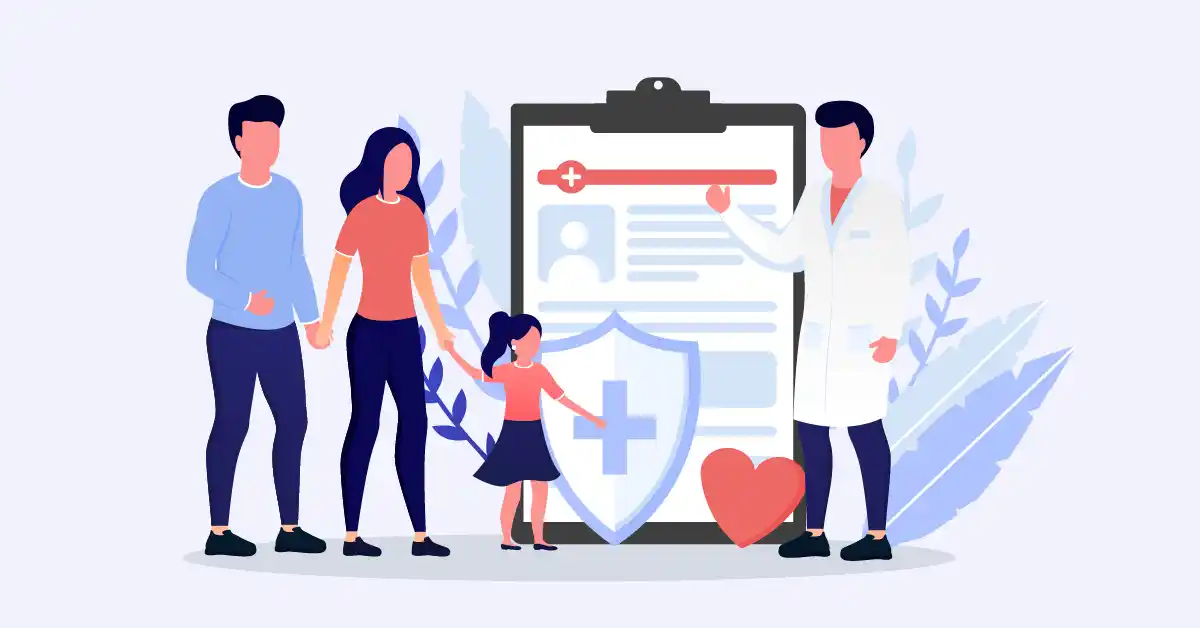

## **Team members**
### Kalyani G 19MIA1064
### Gaurav Trivedi 19MIA1077
### Diya Harish 19MIA1107

## Installing and attaching libraries

In [ ]:
install.packages("tidyverse")
library(tidyverse)
install.packages("ggrepel")
library(ggrepel)
install.packages("reshape2")
library(reshape2)
install.packages("GGally")
library(GGally)
install.packages("randomForest")
library(randomForest)
install.packages("caTools")
library(caTools)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.7      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘Rcpp’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’



Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecifi

## Reading data

In [ ]:
data <- read.csv("Medicalpremium.csv")
head(data)


,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,45,0,0,0,0,155,57,0,0,0,25000
2,60,1,0,0,0,180,73,0,0,0,29000
3,36,1,1,0,0,158,59,0,0,1,23000
4,52,1,1,0,1,183,93,0,0,2,28000
5,38,0,0,0,1,166,88,0,0,1,23000
6,30,0,0,0,0,160,69,1,0,1,23000


In [ ]:
str(data)

'data.frame':	986 obs. of  11 variables:
 $ Age                    : int  45 60 36 52 38 30 33 23 48 38 ...
 $ Diabetes               : int  0 1 1 1 0 0 0 0 1 0 ...
 $ BloodPressureProblems  : int  0 0 1 1 0 0 0 0 0 0 ...
 $ AnyTransplants         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ AnyChronicDiseases     : int  0 0 0 1 1 0 0 0 0 0 ...
 $ Height                 : int  155 180 158 183 166 160 150 181 169 182 ...
 $ Weight                 : int  57 73 59 93 88 69 54 79 74 93 ...
 $ KnownAllergies         : int  0 0 0 0 0 1 0 1 1 0 ...
 $ HistoryOfCancerInFamily: int  0 0 0 0 0 0 0 0 0 0 ...
 $ NumberOfMajorSurgeries : int  0 0 1 2 1 1 0 0 0 0 ...
 $ PremiumPrice           : int  25000 29000 23000 28000 23000 23000 21000 15000 23000 23000 ...


In [ ]:
dim(data)

[1] 986  11

## Plotting Correlattion Matrix

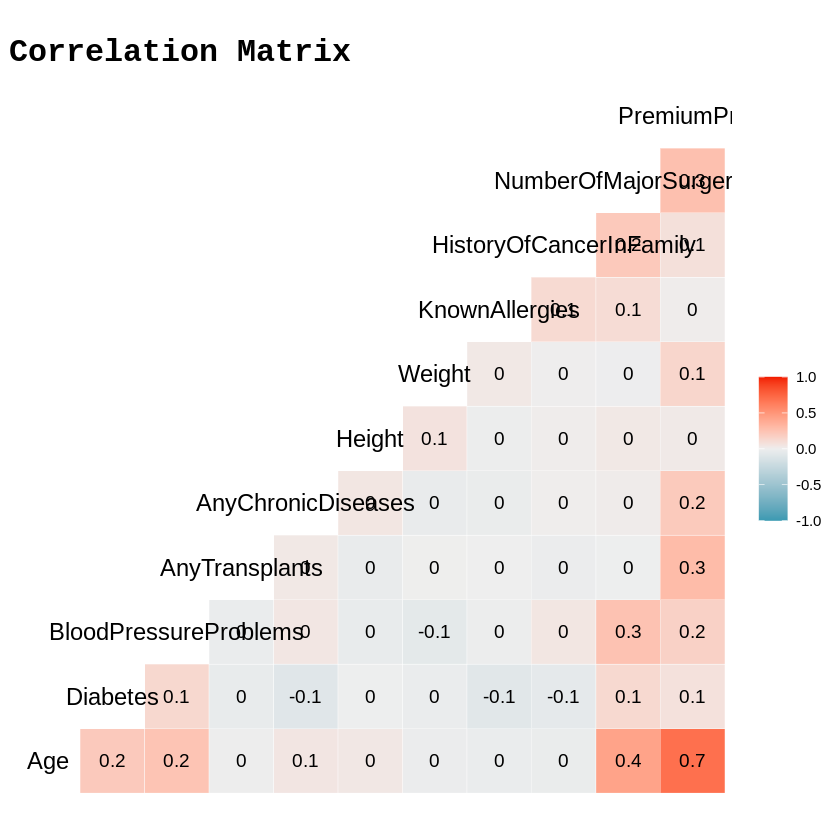

In [ ]:
ggcorr(data, label = T, color = "black", size = 5)+
  labs(title = "Correlation Matrix")+
  theme(plot.title = element_text(family = "Roboto Condensed", size = 19, face = "bold",vjust = 1),
        plot.subtitle = element_text(family = "Roboto Condensed", size = 16,vjust = 0))



## Converting categorical values to numeric values

In [ ]:
data$Diabetes <- as.factor(data$Diabetes)
data$BloodPressureProblems <- as.factor(data$BloodPressureProblems)
data$AnyTransplants <- as.factor(data$AnyTransplants)
data$AnyChronicDiseases <- as.factor(data$AnyChronicDiseases)
data$KnownAllergies <- as.factor(data$KnownAllergies)
data$HistoryOfCancerInFamily <- as.factor(data$HistoryOfCancerInFamily)
data$NumberOfMajorSurgeries <- as.factor(data$NumberOfMajorSurgeries)
str(data)


'data.frame':	986 obs. of  11 variables:
 $ Age                    : int  45 60 36 52 38 30 33 23 48 38 ...
 $ Diabetes               : Factor w/ 2 levels "0","1": 1 2 2 2 1 1 1 1 2 1 ...
 $ BloodPressureProblems  : Factor w/ 2 levels "0","1": 1 1 2 2 1 1 1 1 1 1 ...
 $ AnyTransplants         : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ AnyChronicDiseases     : Factor w/ 2 levels "0","1": 1 1 1 2 2 1 1 1 1 1 ...
 $ Height                 : int  155 180 158 183 166 160 150 181 169 182 ...
 $ Weight                 : int  57 73 59 93 88 69 54 79 74 93 ...
 $ KnownAllergies         : Factor w/ 2 levels "0","1": 1 1 1 1 1 2 1 2 2 1 ...
 $ HistoryOfCancerInFamily: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ NumberOfMajorSurgeries : Factor w/ 4 levels "0","1","2","3": 1 1 2 3 2 2 1 1 1 1 ...
 $ PremiumPrice           : int  25000 29000 23000 28000 23000 23000 21000 15000 23000 23000 ...


## Adding BMI column to the data

In [ ]:
data$bmi <- 10000*(data$Weight/(data$Height)^2)



## Labelling BMI Values

In [ ]:
data <- data %>%
  mutate( bmiCategory = case_when(
    bmi<18.49999 ~ "under weight",
    bmi>18.5 & bmi<24.99999 ~ "normal weight",
    bmi>25 & bmi<29.99999 ~ "over weight",
    bmi>30 ~ "obesity"
  ))

## Plot to compare the mean premium for Diabetic paitents and others

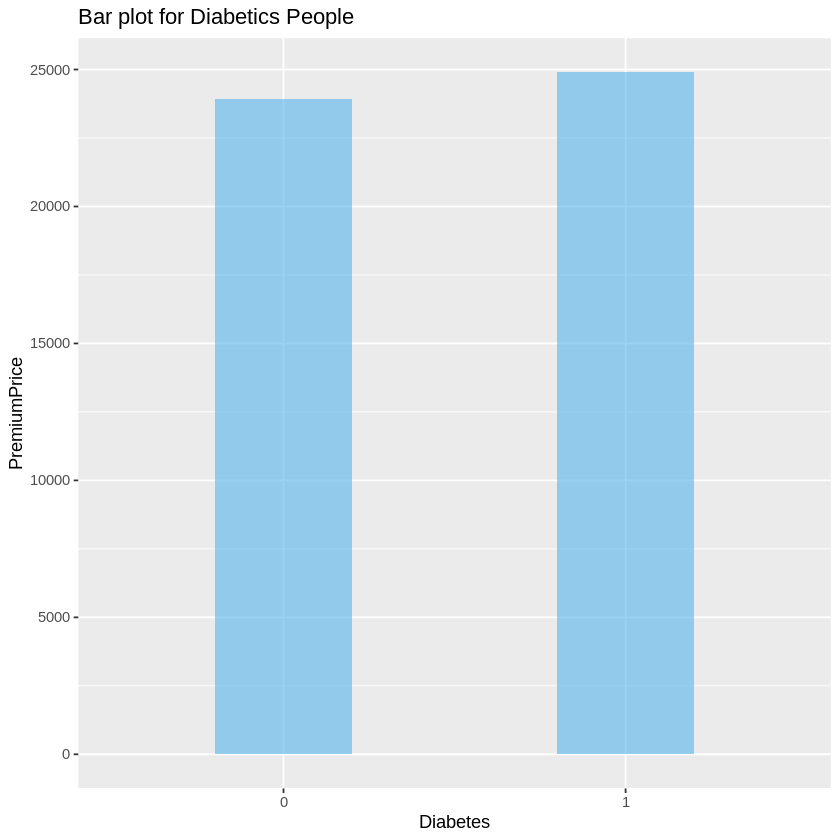

In [ ]:
data %>%
  select(Diabetes,PremiumPrice) %>%
  group_by(Diabetes) %>%
  summarise( PremiumPrice = mean(PremiumPrice)) %>%
  ggplot(.,aes(Diabetes,PremiumPrice))+
  geom_bar(stat = "identity",width = 0.4, fill = "#56B4E9", alpha = 0.6)+
  labs(title = "Bar plot for Diabetics People")


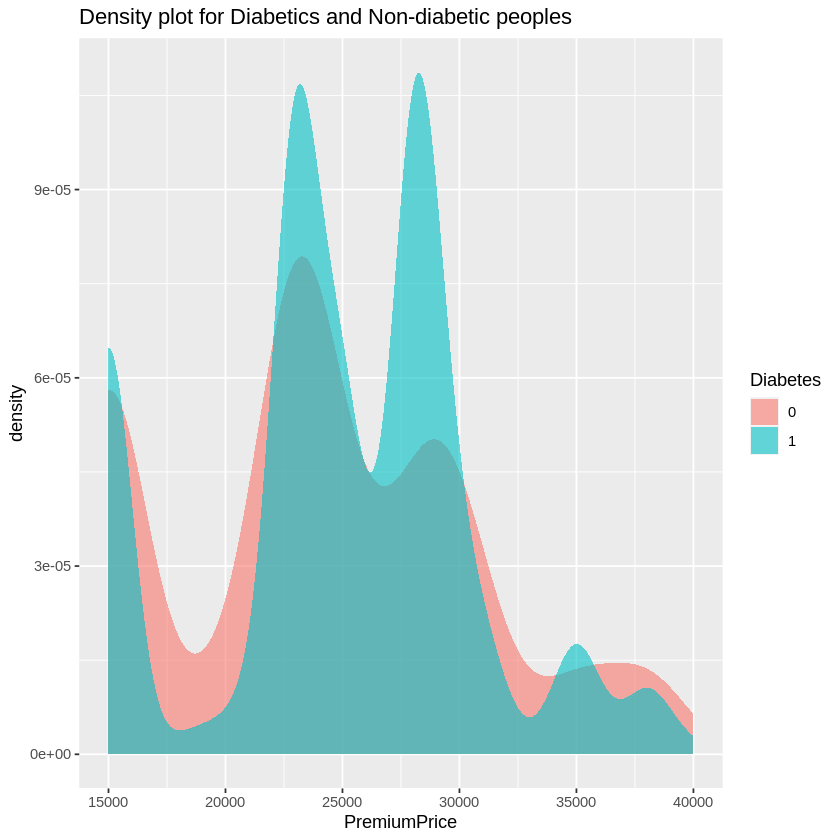

In [ ]:
ggplot(data, aes(PremiumPrice))+
  geom_density(aes(fill = Diabetes), color = NA, alpha = 0.6)+
  labs(title = "Density plot for Diabetics and Non-diabetic peoples")

## Plot to compare the mean premium for Blood pressure paitents and others

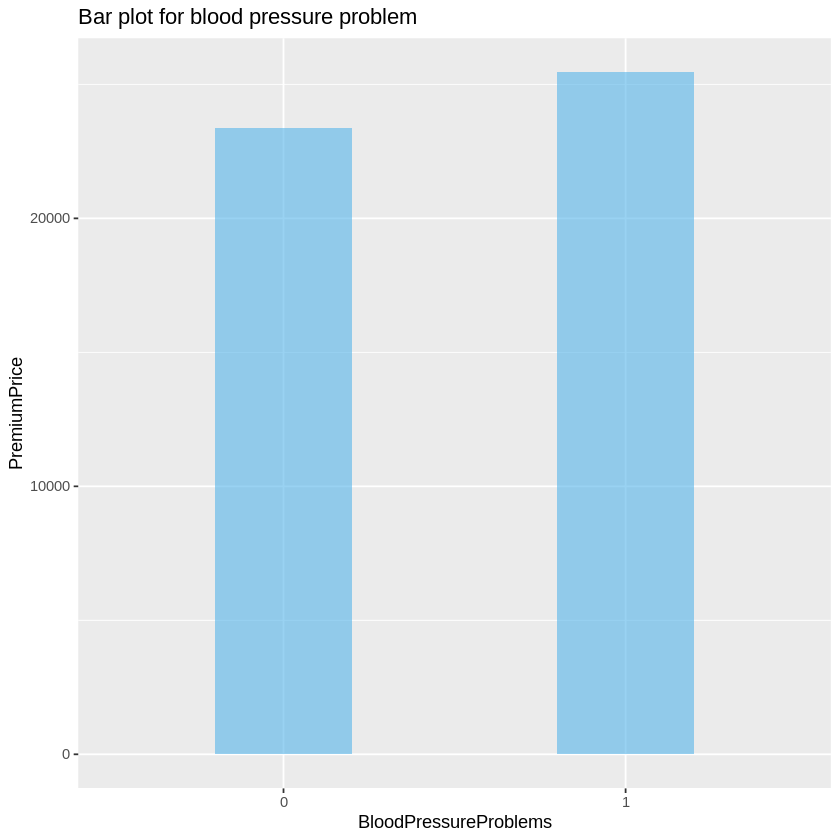

In [ ]:
data %>%
  select(BloodPressureProblems,PremiumPrice) %>%
  group_by(BloodPressureProblems) %>%
  summarise( PremiumPrice = mean(PremiumPrice)) %>%
  ggplot(.,aes(BloodPressureProblems,PremiumPrice))+
  geom_bar(stat = "identity",width = 0.4, fill = "#56B4E9", alpha = 0.6)+
  labs(title = "Bar plot for blood pressure problem")



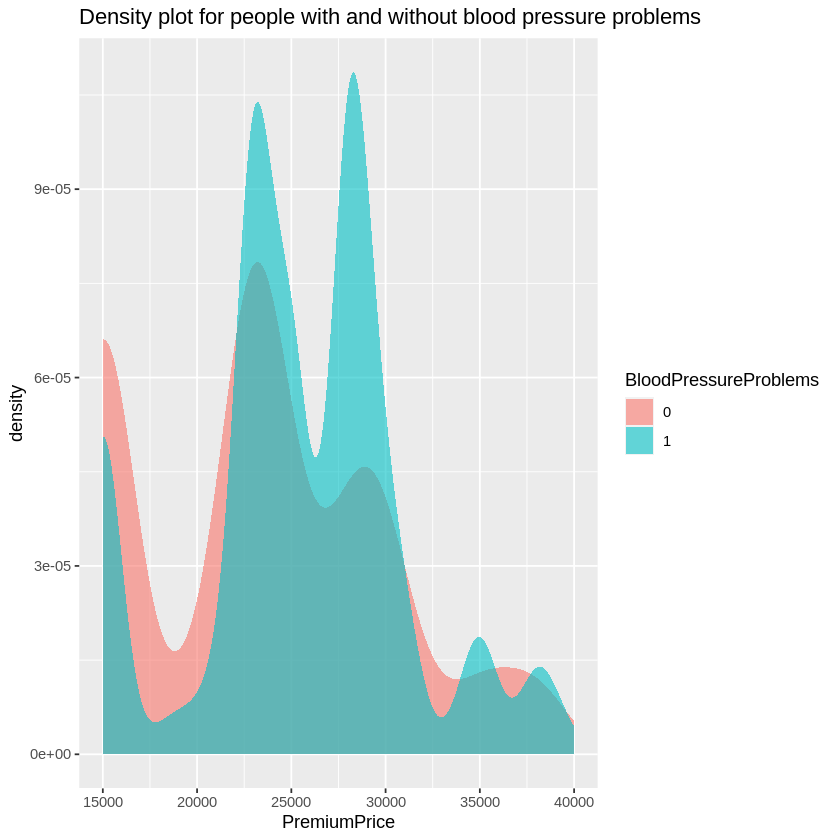

In [ ]:
ggplot(data, aes(PremiumPrice))+
  geom_density(aes(fill = BloodPressureProblems), color = NA, alpha = 0.6)+
  labs(title = "Density plot for people with and without blood pressure problems")

## Plot to compare the mean premium for Any transplant history paitents and others

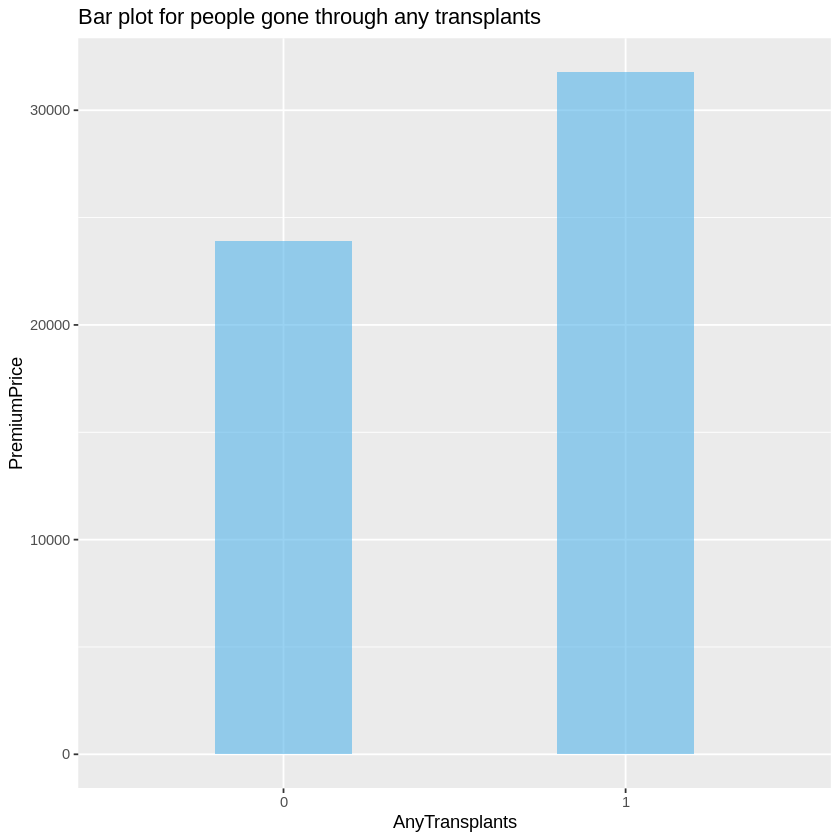

In [ ]:
data %>%
  select(AnyTransplants,PremiumPrice) %>%
  group_by(AnyTransplants) %>%
  summarise( PremiumPrice = mean(PremiumPrice)) %>%
  ggplot(.,aes(AnyTransplants,PremiumPrice))+
  geom_bar(stat = "identity",width = 0.4, fill = "#56B4E9", alpha = 0.6)+
  labs(title = "Bar plot for people gone through any transplants")

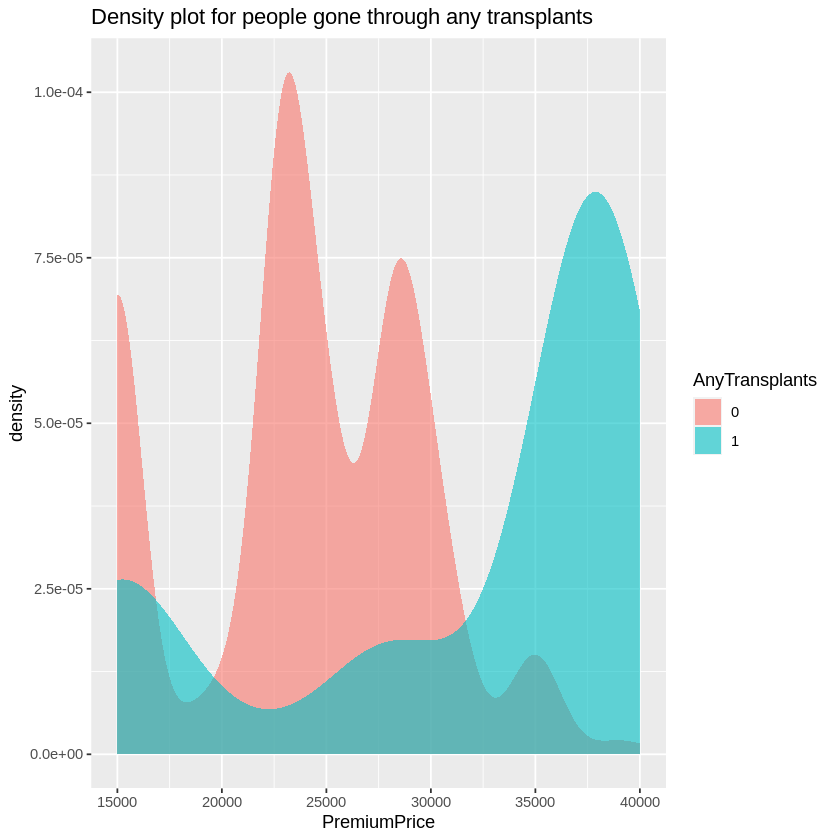

In [ ]:
ggplot(data, aes(PremiumPrice))+
  geom_density(aes(fill = AnyTransplants), color = NA, alpha = 0.6)+
  labs(title = "Density plot for people gone through any transplants")

## Plot to compare the mean premium for Any chronic Disease paitents and others

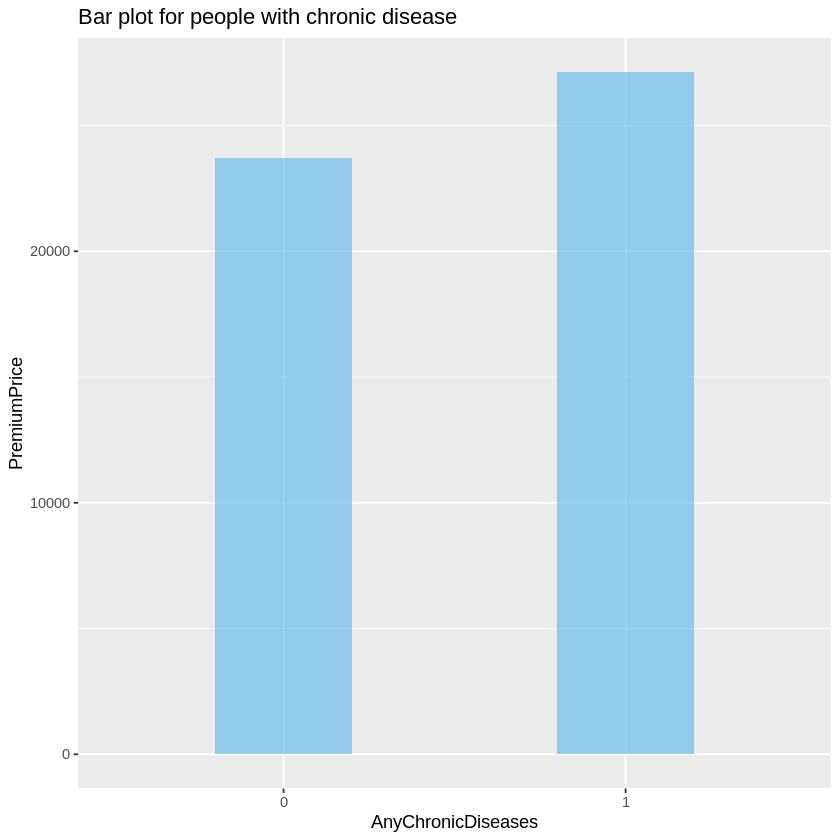

In [ ]:
data %>%
  select(AnyChronicDiseases,PremiumPrice) %>%
  group_by(AnyChronicDiseases) %>%
  summarise( PremiumPrice = mean(PremiumPrice)) %>%
  ggplot(.,aes(AnyChronicDiseases,PremiumPrice))+
  geom_bar(stat = "identity",width = 0.4, fill = "#56B4E9", alpha = 0.6)+
  labs(title = "Bar plot for people with chronic disease")

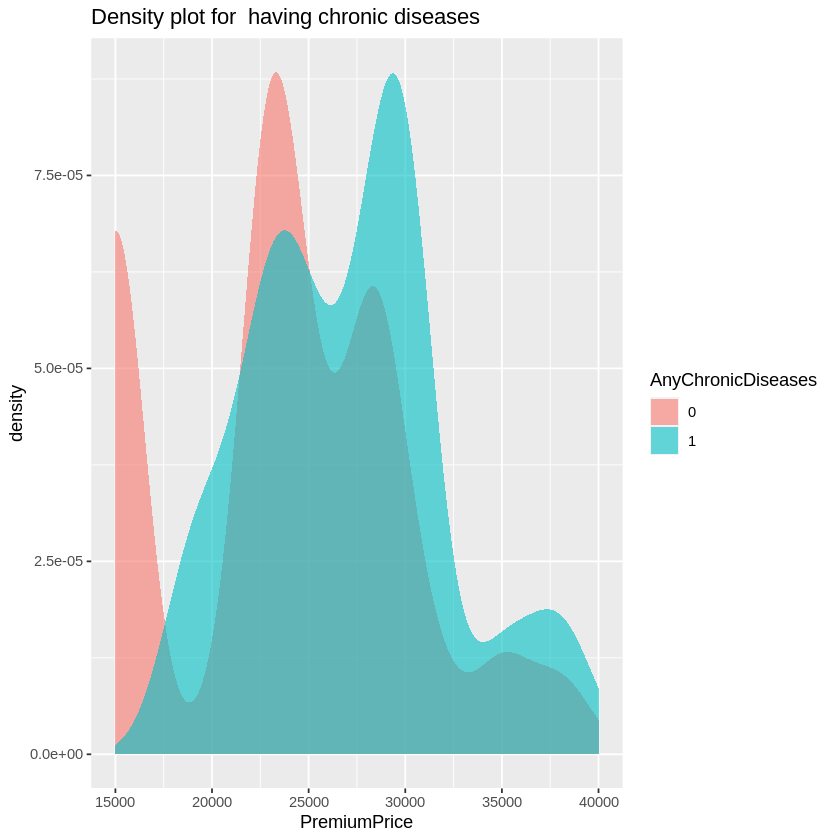

In [ ]:
ggplot(data, aes(PremiumPrice))+
  geom_density(aes(fill = AnyChronicDiseases), color = NA, alpha = 0.6)+
  labs(title = "Density plot for  having chronic diseases")

## Plot to compare the mean premium for Allergies paitents and others

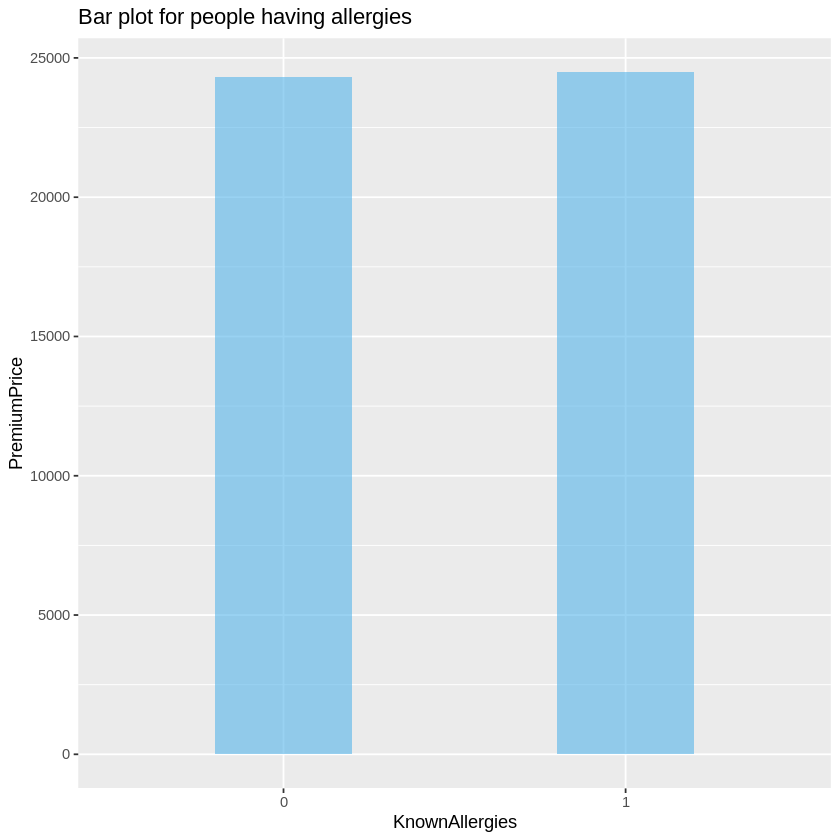

In [ ]:
data %>%
  select(KnownAllergies,PremiumPrice) %>%
  group_by(KnownAllergies) %>%
  summarise( PremiumPrice = mean(PremiumPrice)) %>%
  ggplot(.,aes(KnownAllergies,PremiumPrice))+
  geom_bar(stat = "identity",width = 0.4, fill = "#56B4E9", alpha = 0.6)+
  labs(title = "Bar plot for people having allergies")

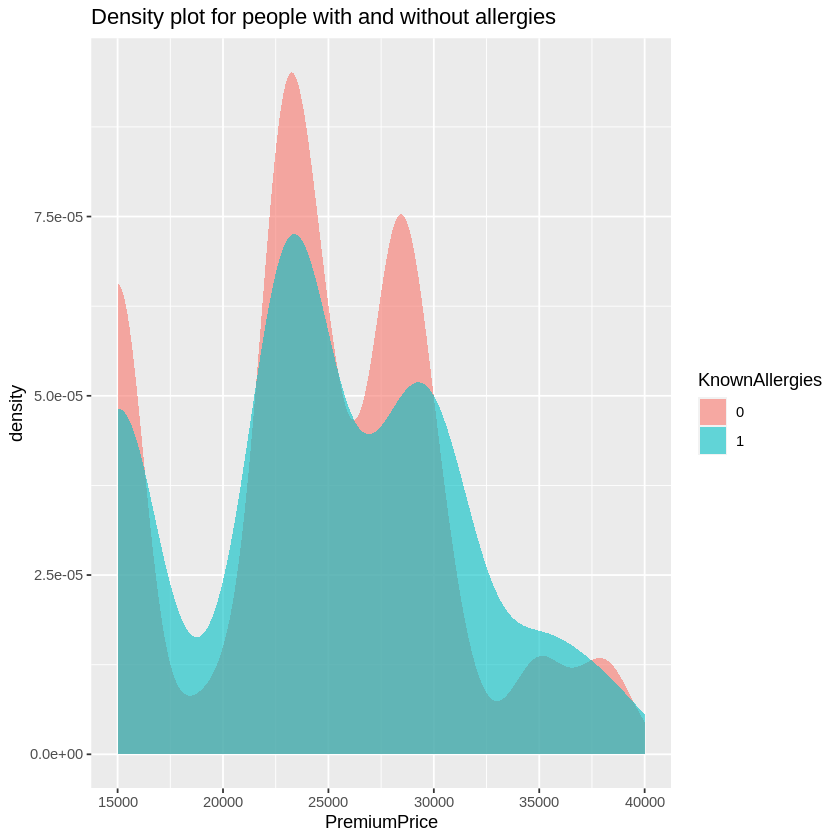

In [ ]:
ggplot(data, aes(PremiumPrice))+
  geom_density(aes(fill = KnownAllergies), color = NA, alpha = 0.6)+
  labs(title = "Density plot for people with and without allergies")

## Plot to compare the mean premium for History of cancer in Family and others

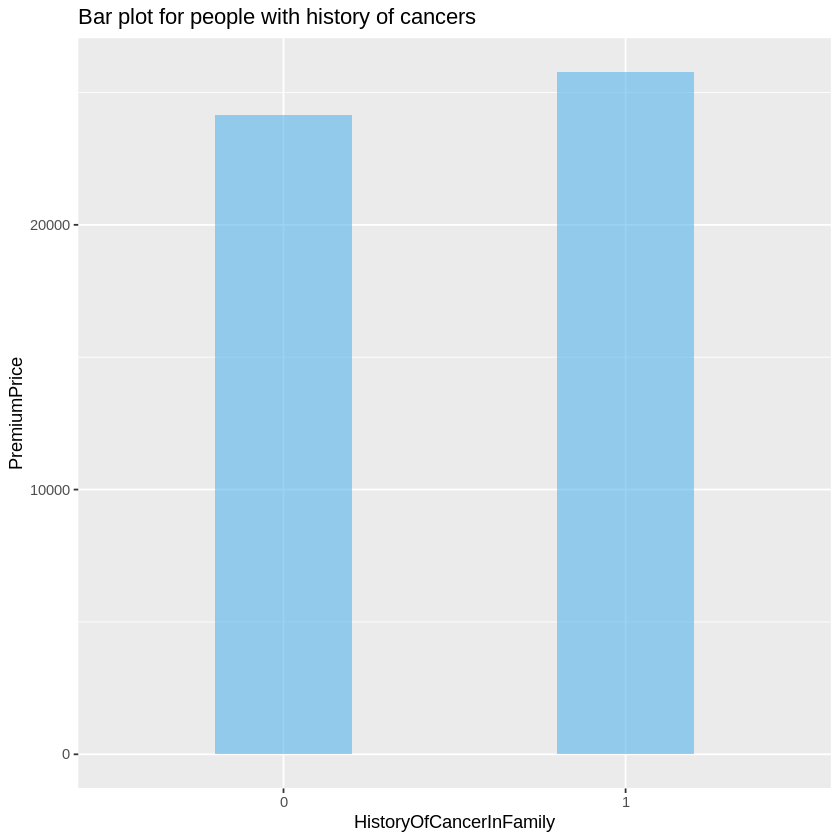

In [ ]:
data %>%
  select(HistoryOfCancerInFamily,PremiumPrice) %>%
  group_by(HistoryOfCancerInFamily) %>%
  summarise( PremiumPrice = mean(PremiumPrice)) %>%
  ggplot(.,aes(HistoryOfCancerInFamily,PremiumPrice))+
  geom_bar(stat = "identity",width = 0.4, fill = "#56B4E9", alpha = 0.6)+
  labs(title = "Bar plot for people with history of cancers")

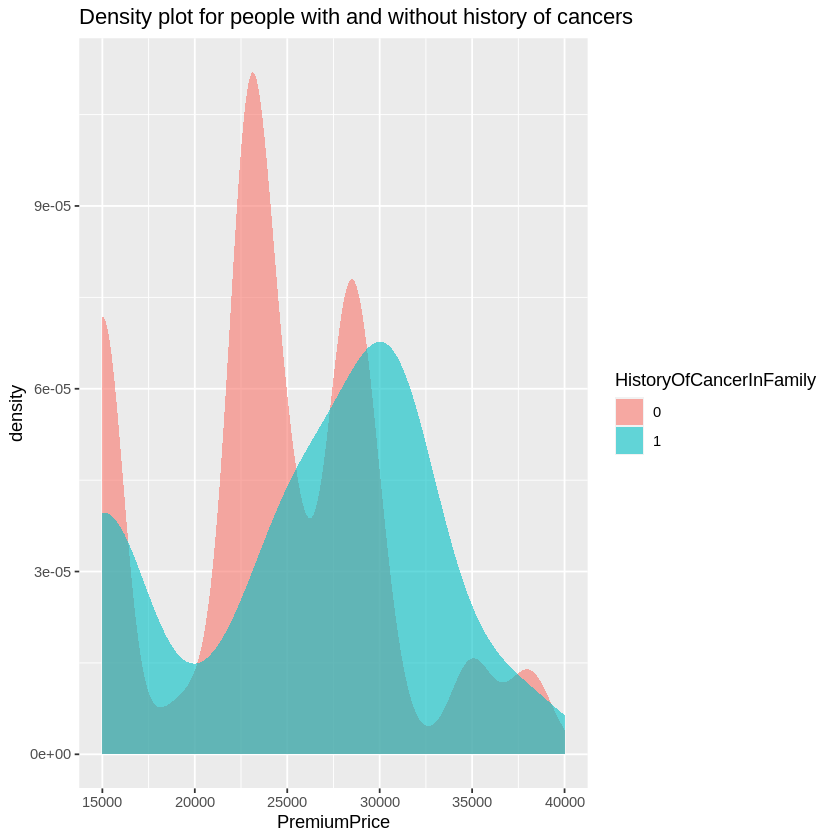

In [ ]:
ggplot(data, aes(PremiumPrice))+
  geom_density(aes(fill = HistoryOfCancerInFamily), color = NA, alpha = 0.6)+
  labs(title = "Density plot for people with and without history of cancers")

## Plot to compare the mean premium for Number of surgeries

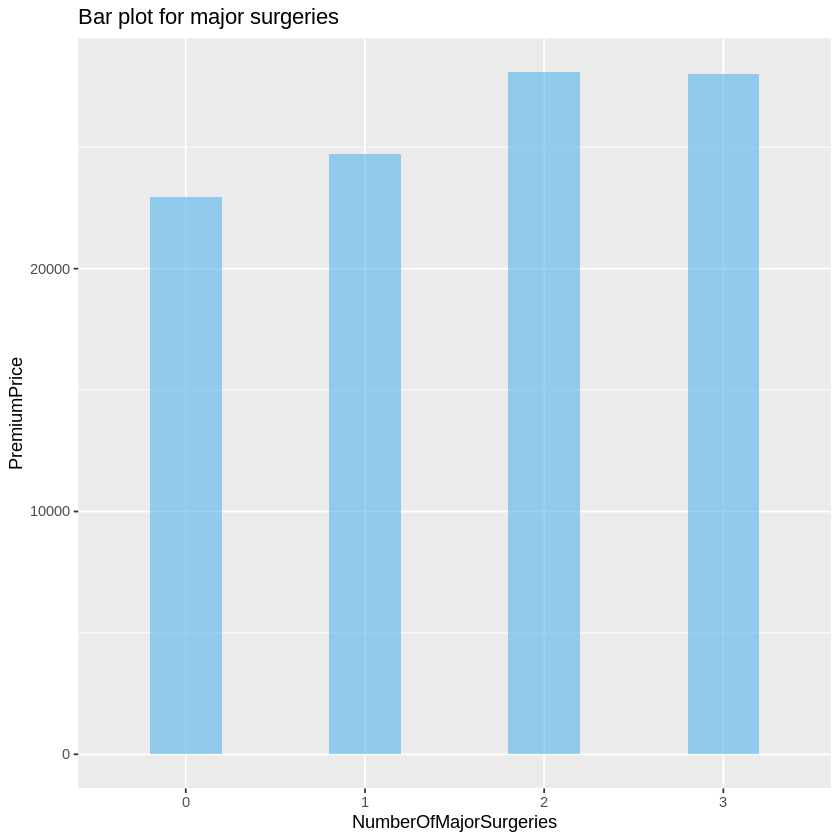

In [ ]:
data %>%
  select(NumberOfMajorSurgeries,PremiumPrice) %>%
  group_by(NumberOfMajorSurgeries) %>%
  summarise( PremiumPrice = mean(PremiumPrice)) %>%
  ggplot(.,aes(NumberOfMajorSurgeries,PremiumPrice))+
  geom_bar(stat = "identity",width = 0.4, fill = "#56B4E9", alpha = 0.6)+
  labs(title = "Bar plot for major surgeries")

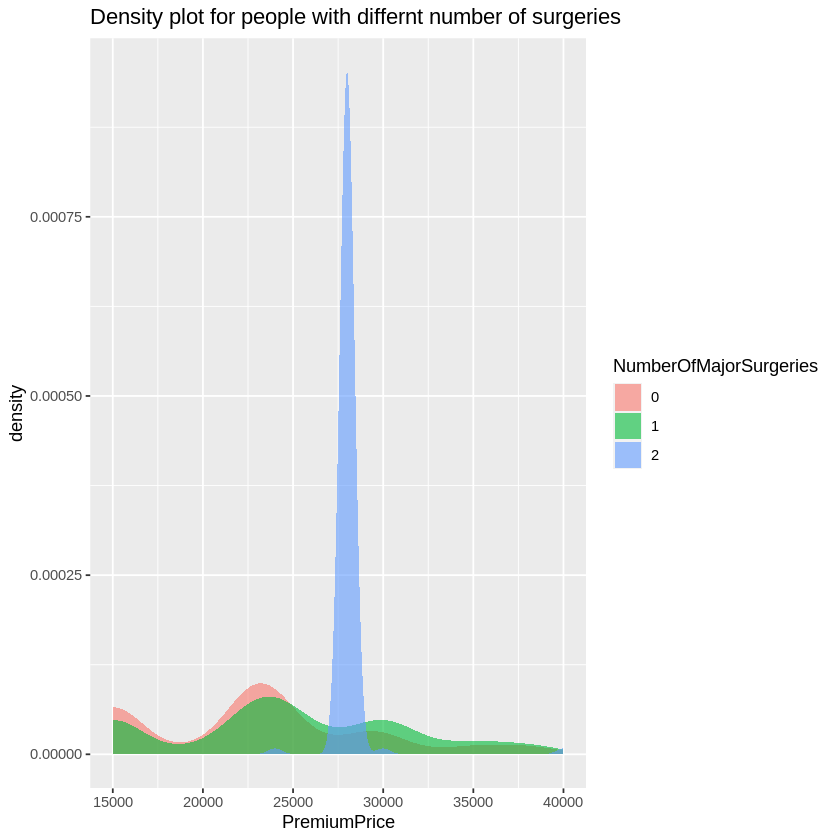

In [ ]:
ggplot(data %>%
         select(NumberOfMajorSurgeries,PremiumPrice) %>%
         filter(!NumberOfMajorSurgeries == 3),
       aes(PremiumPrice))+
       geom_density(aes(fill = NumberOfMajorSurgeries), color = NA, alpha = 0.6)+
       labs(title = "Density plot for people with differnt number of surgeries")

## Plot to visulaize distibution of premium price over different BMI category

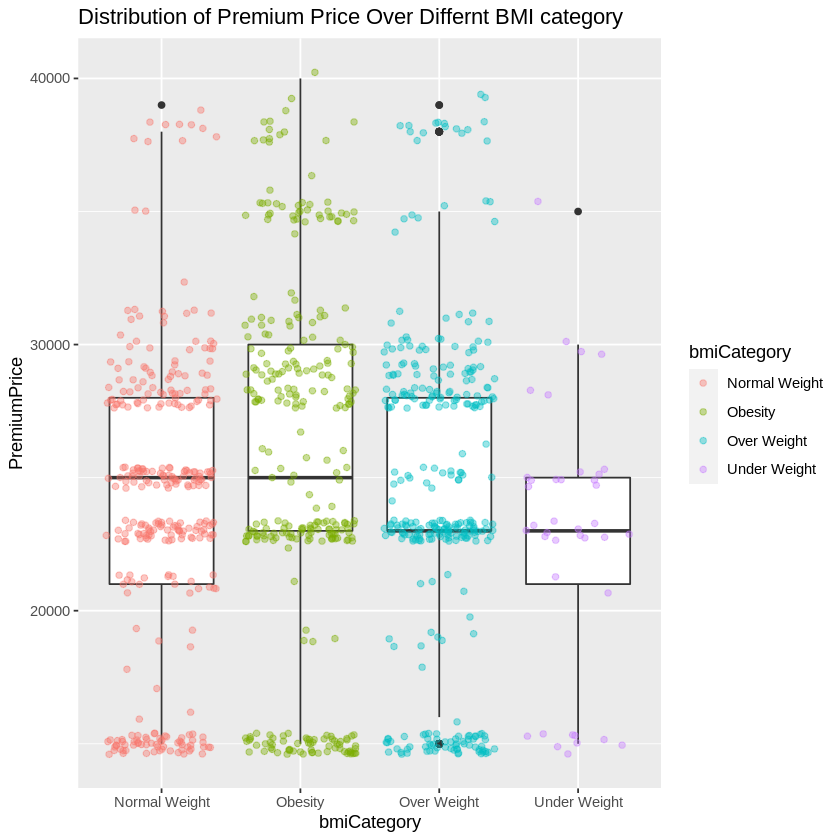

In [ ]:
data %>%
  mutate(bmiCategory = str_to_title(bmiCategory)) %>%
  ggplot(aes(bmiCategory, PremiumPrice))+
  geom_boxplot()+
  geom_jitter(aes(color = bmiCategory),alpha = 0.4)+
  labs(title = "Distribution of Premium Price Over Differnt BMI category")

In [ ]:
data$PremiumPrice <- as.factor(data$PremiumPrice)
summary(data)

      Age        Diabetes BloodPressureProblems AnyTransplants
 Min.   :18.00   0:572    0:524                 0:931         
 1st Qu.:30.00   1:414    1:462                 1: 55         
 Median :42.00                                                
 Mean   :41.75                                                
 3rd Qu.:53.00                                                
 Max.   :66.00                                                
                                                              
 AnyChronicDiseases     Height          Weight       KnownAllergies
 0:808              Min.   :145.0   Min.   : 51.00   0:774         
 1:178              1st Qu.:161.0   1st Qu.: 67.00   1:212         
                    Median :168.0   Median : 75.00                 
                    Mean   :168.2   Mean   : 76.95                 
                    3rd Qu.:176.0   3rd Qu.: 87.00                 
                    Max.   :188.0   Max.   :132.00                 
                    

## Building model for estimating premium cost

## Splitting the train and test data

In [ ]:
sample <- sample.split(data$PremiumPrice, SplitRatio = 0.75)
train <- subset(data, sample == TRUE)
test <- subset(data, sample == FALSE)

dim(train)
dim(test)

[1] 743  13

[1] 243  13

## Building a random forest model using train data

In [ ]:
rf <- randomForest(PremiumPrice ~ .,data=train)
print(rf)


Call:
 randomForest(formula = PremiumPrice ~ ., data = train) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 10.5%
Confusion matrix:
      15000 16000 17000 18000 19000 20000 21000 22000 23000 24000 25000 26000
15000   152     0     0     0     0     0     0     0     0     0     0     0
16000     2     0     0     0     0     0     0     0     0     0     0     0
17000     0     0     0     0     0     0     0     0     0     0     0     0
18000     1     0     0     0     0     0     0     0     0     0     0     0
19000     0     0     0     0    11     0     0     0     0     0     0     0
20000     0     0     0     0     0     0     0     0     0     0     0     0
21000     1     0     0     0     1     0     9     0     8     0     0     0
22000     0     0     0     0     0     0     0     0     0     0     0     0
23000     0     0     0     0     0  

In [ ]:
install.packages('caret')

#Import required library
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘pROC’, ‘recipes’


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




In [ ]:
p1 <- predict(rf, test)
confusionMatrix(p1, test$PremiumPrice)

Confusion Matrix and Statistics

          Reference
Prediction 15000 16000 17000 18000 19000 20000 21000 22000 23000 24000 25000
     15000    50     0     0     0     0     0     0     0     0     0     0
     16000     0     0     0     0     0     0     0     0     0     0     0
     17000     0     0     0     0     0     0     0     0     0     0     0
     18000     0     0     0     0     0     0     0     0     0     0     0
     19000     0     0     0     0     4     0     0     0     0     0     0
     20000     0     0     0     0     0     0     0     0     0     0     0
     21000     0     0     0     0     0     0     4     0     0     0     0
     22000     0     0     0     0     0     0     0     0     0     0     0
     23000     0     0     0     0     0     0     2     0    62     0     3
     24000     0     0     0     0     0     0     0     0     0     0     0
     25000     0     1     0     0     0     0     0     0     0     0    20
     26000     0     0 

In [ ]:
pred <- predict(rf, newdata = test[-11])
cm <- table(pred,obs = test[,11])

In [ ]:
sum <- 0
for (i in 1:24){
  for(j in 1:24){
    if(i!=j){
      sum <-sum+cm[i,j]
    }
  }
}
sum
print(paste("The Accuracy of Random Forest Model is",(243-sum)/2.43))

[1] 22

[1] "The Accuracy of Random Forest Model is 90.9465020576132"


Different performance metrix
Results explanation
Explore algorithms
Performance metric
Statistical tests


In [ ]:
# read the file in
df <- read_csv('insurance.csv')

# denote factor variables
df$sex <- factor(df$sex)
df$smoker <- factor(df$smoker)
df$region <- factor(df$region)
df$children <- factor(df$children)

Rows: 1338 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): sex, smoker, region
dbl (4): age, bmi, children, charges

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
# check data types
df %>% str()

spec_tbl_df [1,338 × 7] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ age     : num [1:1338] 19 18 28 33 32 31 46 37 37 60 ...
 $ sex     : Factor w/ 2 levels "female","male": 1 2 2 2 2 1 1 1 2 1 ...
 $ bmi     : num [1:1338] 27.9 33.8 33 22.7 28.9 25.7 33.4 27.7 29.8 25.8 ...
 $ children: Factor w/ 6 levels "0","1","2","3",..: 1 2 4 1 1 1 2 4 3 1 ...
 $ smoker  : Factor w/ 2 levels "no","yes": 2 1 1 1 1 1 1 1 1 1 ...
 $ region  : Factor w/ 4 levels "northeast","northwest",..: 4 3 3 2 2 3 3 2 1 2 ...
 $ charges : num [1:1338] 16885 1726 4449 21984 3867 ...
 - attr(*, "spec")=
  .. cols(
  ..   age = col_double(),
  ..   sex = col_character(),
  ..   bmi = col_double(),
  ..   children = col_double(),
  ..   smoker = col_character(),
  ..   region = col_character(),
  ..   charges = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


## Statistical Tests

In [ ]:
df

age,sex,bmi,children,smoker,region,charges
<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>
19,female,27.9,0,yes,southwest,16884.92
18,male,33.8,1,no,southeast,1725.55
28,male,33.0,3,no,southeast,4449.46
33,male,22.7,0,no,northwest,21984.47
32,male,28.9,0,no,northwest,3866.86
31,female,25.7,0,no,southeast,3756.62
46,female,33.4,1,no,southeast,8240.59
37,female,27.7,3,no,northwest,7281.51
37,male,29.8,2,no,northeast,6406.41


## 1. Smokers

In [ ]:
df %>%
    group_by(region) %>%
      summarise(
        count = n(),
        min = min(charges),
        median = median(charges),
        max = max(charges),
        IQR = IQR(charges)
      ) %>%
    arrange(desc(median)) # sort by median in descending order

region,count,min,median,max,IQR
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
northeast,324,1694.80,10057.65,58571.07,11493.04
southeast,364,1121.87,9294.13,63770.43,15085.40
northwest,325,1621.34,8965.80,60021.40,9992.00
southwest,325,1241.57,8798.59,52590.83,8711.45


In [ ]:
wilcox.test(df$charges ~ df$smoker)


	Wilcoxon rank sum test with continuity correction

data:  df$charges by df$smoker
W = 7403, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


H0: There is no difference in the distribution scores.
HA: There is a difference in the distribution scores.
The test indicated that there is a significant difference between the groups, W = 7403, p < 0.001. The null hypothesis is rejected.

## 2. Region

In [ ]:
df %>%
    group_by(region) %>%
      summarise(
        count = n(),
        min = min(charges),
        median = median(charges),
        max = max(charges),
        IQR = IQR(charges)
      ) %>%
    arrange(desc(median)) # sort by median in descending order

region,count,min,median,max,IQR
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
northeast,324,1694.80,10057.65,58571.07,11493.04
southeast,364,1121.87,9294.13,63770.43,15085.40
northwest,325,1621.34,8965.80,60021.40,9992.00
southwest,325,1241.57,8798.59,52590.83,8711.45


In [ ]:
kruskal.test(charges ~ region, data = df)


	Kruskal-Wallis rank sum test

data:  charges by region
Kruskal-Wallis chi-squared = 4.7342, df = 3, p-value = 0.1923


H0: There is no difference between the medians.
HA: There is a difference between the medians.
The test showed that the difference between the median medical charges in different regions is not significant, H(3) = 4.73, p = 0.19. A significant level of 0.19 indicates a 19% risk of concluding that a difference exists when there is no actual difference. The null hypothesis is accepted.

## 3. Children

In [ ]:
df %>%
    group_by(children) %>%
      summarise(
        count = n(),
        min = min(charges),
        median = median(charges),
        max = max(charges),
        IQR = IQR(charges)
      ) %>%
    arrange(desc(median)) # sort by median in descending order

children,count,min,median,max,IQR
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
4,25,4504.66,11033.660,40182.25,9616.16
3,157,3443.06,10600.550,60021.40,12547.41
0,574,1121.87,9856.950,63770.43,11705.70
2,240,2304.00,9264.980,49577.66,14094.34
5,18,4687.80,8589.565,19023.26,4144.97
1,324,1711.03,8483.870,58571.07,10840.40


In [ ]:
kruskal.test(charges ~ children, data = df)


	Kruskal-Wallis rank sum test

data:  charges by children
Kruskal-Wallis chi-squared = 29.487, df = 5, p-value = 1.86e-05


A Kruskal-Wallis test (assumptions met) also showed that the number of dependents covered by the insurance policy significantly affects medical costs billed on that policy by the insurance company, H(5) = 29.49, p < 0.001.

In [ ]:
charges_hist <- df %>%
    ggplot(
        aes(x=charges)
        ) +
    geom_histogram(
        binwidth = 2000,
        show.legend = FALSE,
        fill = "#FFC300"
        )+
    labs(
        x = "Charges to policyholders ($)",
        y = "Number of policyholders",
        title = "Distribution of medical charges"
        )+
    # resize text
    theme(
        plot.title = element_text(size=16),
        axis.text = element_text(size=14),
        axis.title = element_text(size=14)
    )

charges_hist_log10 <- df %>%
    ggplot(
        aes(x=log10(charges))
        ) +
    geom_histogram(
        show.legend = FALSE,
        fill = "#FFC300"
        )+
    labs(
        x = "Charges to policyholders log10 transformed",
        y = "Number of policyholders",
        title = "Distribution of medical charges after log10 transform"
        )+
    # resize text
    theme(
        plot.title = element_text(size=16),
        axis.text = element_text(size=14),
        axis.title = element_text(size=14)
    )


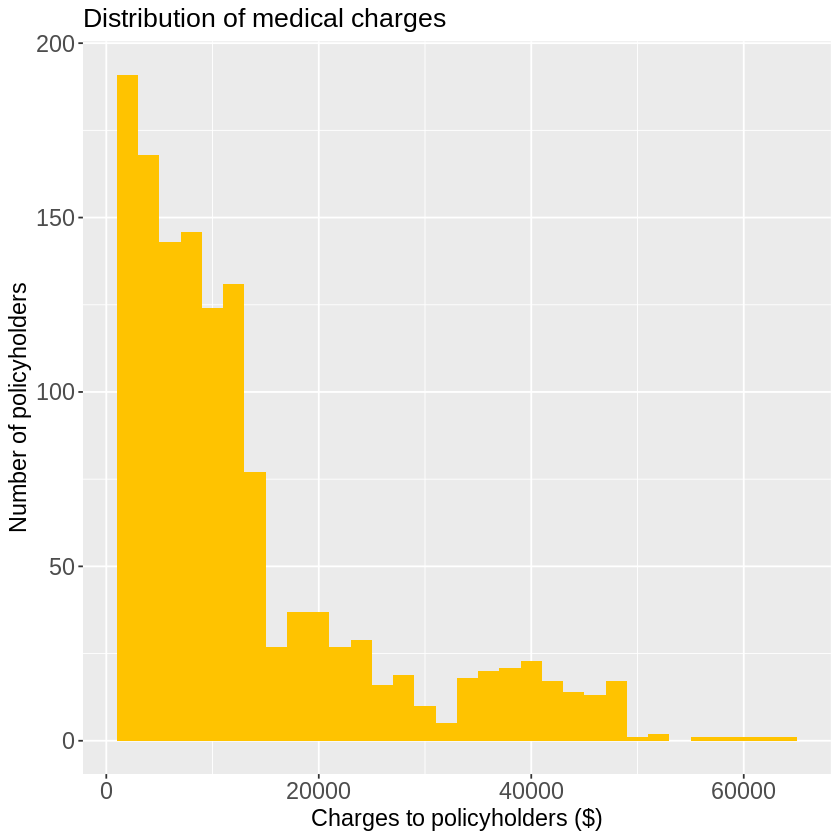

In [ ]:
charges_hist

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



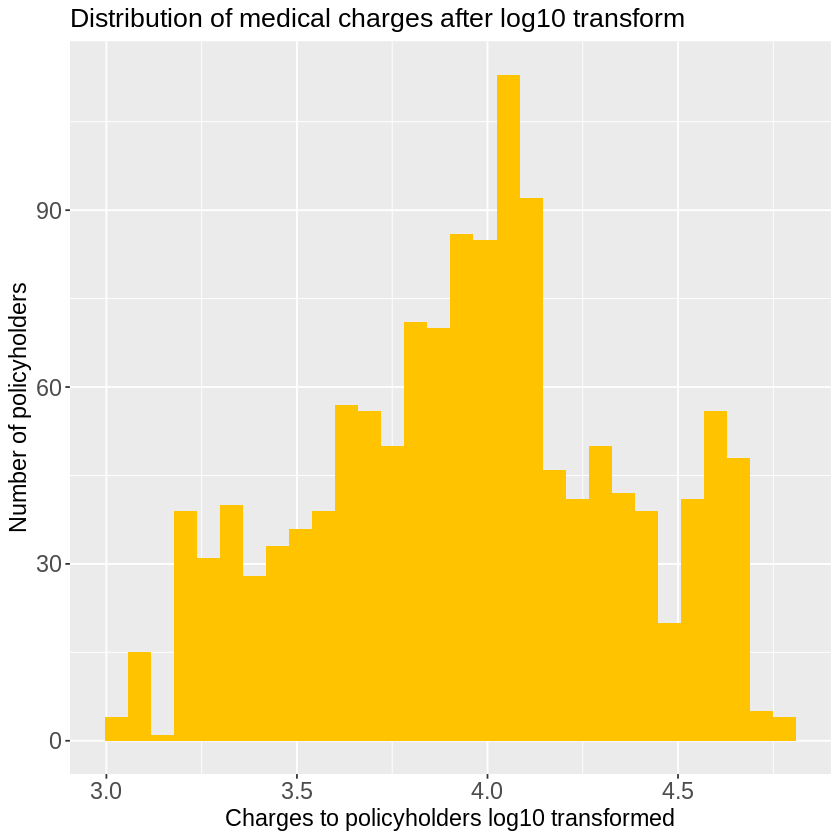

In [ ]:
charges_hist_log10

In [ ]:
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(caret)

In [ ]:
# log10 transform of response variable
df$logCharges<- log10(df$charges)

# Split the data into training and test sets
set.seed(122)                    # Set the seed to make the partition reproducible
training.samples <- df$logCharges %>% createDataPartition(p = 0.8, list = FALSE)
train  <- df[training.samples, ]
test <- df[-training.samples, ]

In [ ]:
# Train the model on the training dataset
formula <- as.formula("logCharges ~ smoker + bmi + age + children + sex + region")

model <- lm(formula, data = train)

summary(model)


Call:
lm(formula = formula, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.40616 -0.09020 -0.02317  0.03310  0.93634 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      3.0309810  0.0342281  88.553  < 2e-16 ***
smokeryes        0.6760177  0.0144519  46.777  < 2e-16 ***
bmi              0.0058027  0.0009931   5.843 6.81e-09 ***
age              0.0153611  0.0004142  37.088  < 2e-16 ***
children1        0.0538514  0.0146930   3.665 0.000260 ***
children2        0.1287088  0.0161331   7.978 3.84e-15 ***
children3        0.1086630  0.0189419   5.737 1.26e-08 ***
children4        0.2109956  0.0411738   5.125 3.54e-07 ***
children5        0.1836043  0.0552913   3.321 0.000929 ***
sexmale         -0.0304862  0.0115908  -2.630 0.008657 ** 
regionnorthwest -0.0305322  0.0164325  -1.858 0.063441 .  
regionsoutheast -0.0598820  0.0168307  -3.558 0.000390 ***
regionsouthwest -0.0562472  0.0165515  -3.398 0.000703 ***
---
Signif. 

A significant regression equation was found (F(12,1057) = 303.9, p < 0.001), with an adjusted R-squared of 0.7764. In other words, the model explains 77.6% of total variance in the sample. Null hypothesis is rejected

In [ ]:
# Make predictions on the training dataset
predictions <- model %>% predict(train)
# Model performance
# (a) Calculating the residuals
residuals <- train$logCharges - predictions
# (b) Calculating Root Mean Squared Error
rmse <- sqrt(mean(residuals^2))

rmse %>%
    round(digits=3)

[1] 0.187

In [ ]:
# Make predictions on the testing dataset
predictions <- model %>% predict(test)
# Model performance
# (a) Calculating the residuals
residuals <- test$logCharges - predictions
# (b) Calculating Root Mean Squared Error
rmse <- sqrt(mean(residuals^2))

rmse %>%
    round(digits=3)

[1] 0.208

Since the response variable had been transformed, RMSE values have lost their units and are not easily interpretable. To interpret RMSE in a meaningful way, some backtransformations need to be performed.

In [ ]:
# Calculating RMSE for training data with backtransformed data

predictions <- model %>% predict(train)
# Model performance
# (a) Calculating the residuals
residuals <- 10^train$logCharges - 10^predictions # backtransform measured and predicted values
# (b) Calculating Root Mean Squared Error
rmse <- sqrt(mean(residuals^2))

round(rmse)

[1] 8334

In [ ]:
# Calculating RMSE for testing data with backtransformed data

predictions <- model %>% predict(test)
# Model performance
# (a) Calculating the residuals
residuals <- 10^test$logCharges - 10^predictions # backtransform measured and predicted values
# (b) Calculating Root Mean Squared Error
rmse <- sqrt(mean(residuals^2))

round(rmse)

[1] 9000

To measure robustness of the model, an absolute measure of fit - RMSE was calculated, RMSE (test set) = 0.208, RMSE (training set) = 0.187. This is an indicator that the model is not overfit. After backtransforming the residuals, the RMSE for the test set was $9000, meaning the model's predictions are usually off by this amount.

## Conclusion
Smoking having the strongest effect on medical expenses is quite expected.

Increases in the BMI score lead to rather small expense increases, however, it is worth pointing out that normal BMI scores are not indicative of ill health. Only people in the underweight (BMI < 18.5), overweight (BMI 25.0 to 29.9), and obese (BMI  ≥  30) ranges would be expected to have poorer health outcomes.

Same should be said of the effect of aging - 22-year-olds would be expected to enjoy the same level of health as 18-year-olds despite being 4 years older. However, middle aged and elderly people will most likely see a rapid decline in health year by year.

Medical expenses increasing with increased number of dependents is to be expected. However, having three dependents covered by insurance seems to be cheaper than having two dependents, and five dependents sees a lesser increase in charges than four. This may be explained by the uneven number of observations in each group. For example, no dependents group has 574 observations when five dependents group only has 18.

It is also interesting to note that even though the median difference of medical charges between men and women is only $43, the relationship between sex and medical charges was significant in the multiple linear regression model.

Lastly, whether the model is robust can only be determined knowing what is the acceptable cost of error. Being able to explain 77.9% of the total variance with an RMSE of $9000 may well be enough if the company can deal with the potential mispredictions.